# Подготовка данных для выявления связи между условий жизни учащихся на их успеваемость по математике

Цель проекта: исследовать и подготовить данные для последующего моделирования

Задачи: 
* провести первичную обработку данных
* пронанализировать распределение признаков для числовых переменных и устраните выбросы
* оценить количество уникальных значений для номинативных переменных и выполнить необходимые преобразования
* провести корреляционный анализ количественных переменных и отобрать не коррелирующие признаки
* сформулировать выводы относительно качества данных и тех переменных, которые будут использоваться в дальнейшем построении модели

## Первичная обработка данных

In [1]:
# import require dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# load data
students = pd.read_csv('stud_math.csv')

In [2]:
display(students.head())
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете представлено 395 строк и 30 столбцов (13 числовых и 17 строковых). Целевой переменной для последующего моделирования будет являтся столбец score.

In [3]:
# rename the only strangely named column, so that it could be accessed easily
students.rename(columns = {'studytime, granular': 'studytime_gran'}, inplace = True) 

In [4]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,studytime_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Вспомогательные функции

In [5]:
def describe_numerical(col, bins=10):
    display(students[col].hist(bins=bins))
    print(students[col].describe())
    
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'].dropna(), 
                        students.loc[students.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
            <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

## Первичный анализ данных - числовые признаки

### age - возраст ученика

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


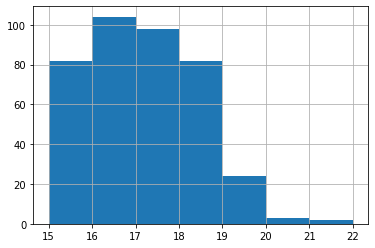

In [6]:
describe_numerical('age', bins=7)

Данные распределены нормально в диапазоне 16-19 с пятью строками больше 19, которые мы можем считать выбросами, так как таких данных явно недостаточно для обучения. Поэтому мы удалим такие строки.

In [7]:
students = students[students.age<20]

### Medu — образование матери

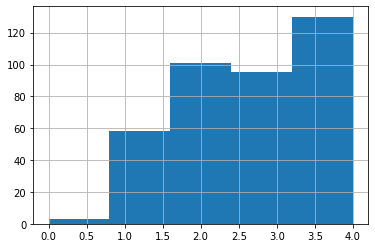

In [8]:
students.Medu.hist(bins=5)

Хотя в этой колонке используются числа, это категориальный признак. Классы (особенно класс 0) представлены не равномерно. Поэтому класс 0 (это 3 строки) тоже удаляем.

In [9]:
students = students[students.Medu>0]

### Fedu — образование отца

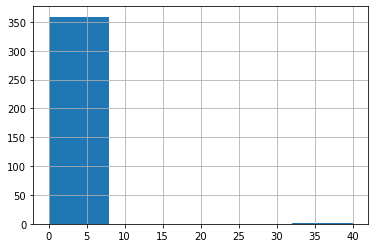

In [10]:
students.Fedu.hist(bins=5)

In [11]:
students.Fedu[students.Fedu>5]

11    40.0
Name: Fedu, dtype: float64

В этой колонке присутствует выброс (40.0), видимо из-за некорректного ввода. Так как мы уже удалили чуть больше 10 строк, в этот раз мы исправим это значение на логичное - 4

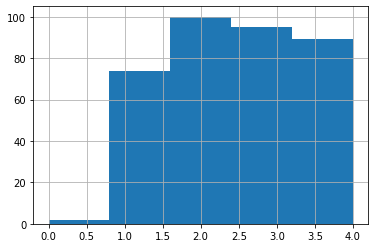

In [12]:
students.loc[students.Fedu == 40, 'Fedu'] = 4.0
students.Fedu.hist(bins=5)

Это тоже категориальный признак и класс 0 опять в большом меньшенстве. Поэтому тоже его удаляем.

In [13]:
students = students[students.Fedu>0]

### traveltime — время в пути до школы

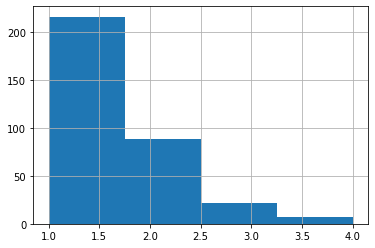

In [14]:
students.traveltime.hist(bins=4)

Очередной категориальный признак. Большинство студентов живут в пределах 30 минут от школы. Данные распределены по классам неравномерно, но пока оставим все как есть.

### studytime — время на учёбу помимо школы в неделю

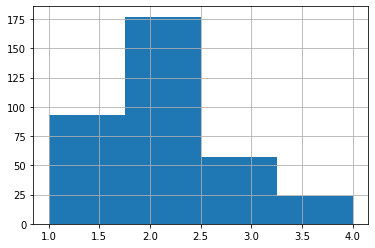

In [15]:
students.studytime.hist(bins=4)

Еще один категориальный признак, около половины студентов дополнительно учатся 2-5 часов в день. Ничего менять пока не требуется

### failures — количество внеучебных неудач

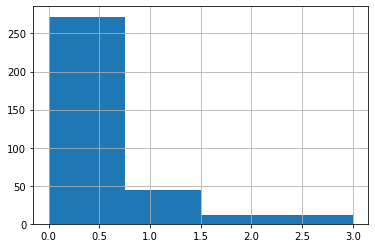

In [16]:
students.failures.hist(bins=4)

Большинство студентов удачливы. Только 24 человека имели трудности. В зависимости от важности этого признака, возможно потребуется вынести их в один класс. 

### studytime_gran - (описание отсутствует)

count    351.000000
mean      -6.102564
std        2.512999
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_gran, dtype: float64


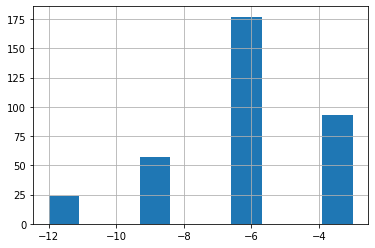

In [17]:
describe_numerical('studytime_gran')

In [18]:
students.studytime.corr(students.studytime_gran)

-0.9999999999999993

Данные в этой колонке обратно коррелируют с studytime и у нас к ней нет описания, поэтому ее удаляем.

In [19]:
students.drop(['studytime_gran'], inplace = True, axis = 1)

### famrel — семейные отношения

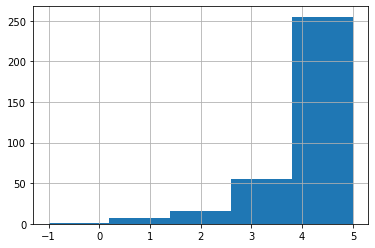

In [20]:
students.famrel.hist(bins=5)

Еще один категориальный признак с несбалансированными классами и с выбросом -1 в одной из строк. Удаляем эту строку:

In [21]:
students = students[students.famrel>0]

### freetime — свободное время после школы

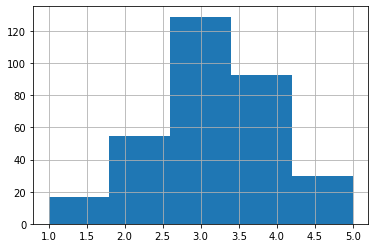

In [22]:
students.freetime.hist(bins=5)

Нормально распределенный категориальный признак. Выбросов нет.

### goout — проведение времени с друзьями

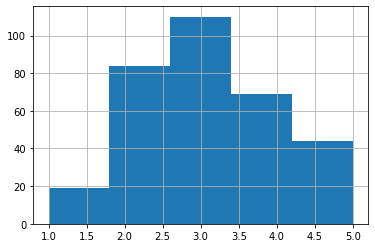

In [23]:
students.goout.hist(bins=5)

Тоже нормально распределенный категориальный признак. Выбросов нет.

### health — текущее состояние здоровья

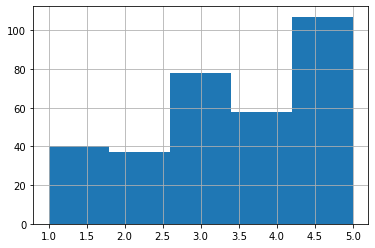

In [24]:
students.health.hist(bins=5)

Категориальный признак. Наибольший класс - здоровые учащиеся.

### absences — количество пропущенных занятий

count    321.000000
mean       6.794393
std       22.437304
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


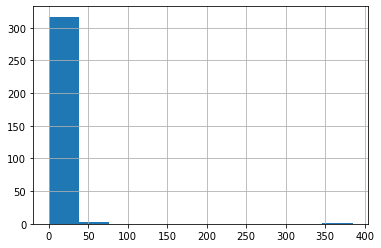

In [25]:
describe_numerical('absences')

Медиана пропусков - 4, но есть кто-то кто пропустил больше года. Считаем это выбросом и удаляем строку.

count    320.000000
mean       5.612500
std        7.430335
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       56.000000
Name: absences, dtype: float64


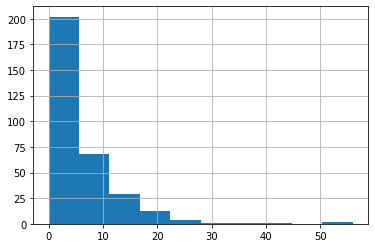

In [26]:
students = students[students.absences<100]

describe_numerical('absences')

### score — баллы по госэкзамену по математике

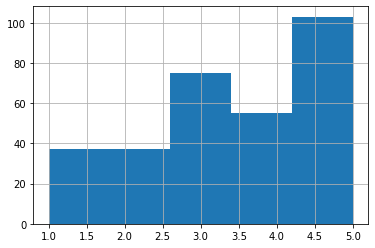

In [27]:
students.health.hist(bins=5)

Наша целевая переременная, которую будем прогнозировать. Распределение смещено вправо, в наших данных больше тех, кто имеет хорошую успеваемость по математике.

## Первичный анализ данных - номинативные переменные

### school — аббревиатура школы, в которой учится ученик

In [28]:
students.school.value_counts()

GP    283
MS     37
Name: school, dtype: int64

Всего две школы с большим дисбалансом. Возможно, придется этот признак проигнорировать.

## sex — пол ученика

In [29]:
students.sex.value_counts()

F    176
M    144
Name: sex, dtype: int64

Признак практически сбалансирован. Ничего менять не надо.

## address — тип адреса ученика

In [30]:
display(students.address.value_counts())
print("Missing: ", students.address.isna().sum())

U    242
R     68
Name: address, dtype: int64

Missing:  10


Категориальный параметр. Большинство учащихся из города. 10 пропущенных значений.

## famsize — размер семьи

In [31]:
display(students.famsize.value_counts())
print("Missing: ", students.famsize.isna().sum())

GT3    214
LE3     86
Name: famsize, dtype: int64

Missing:  20


Преимущественно ученики из семей, где больше трех детей. 20 пропущенных. 

## Pstatus — статус совместного жилья родителей

In [32]:
display(students.Pstatus.value_counts())
print("Missing: ", students.Pstatus.isna().sum())

T    255
A     26
Name: Pstatus, dtype: int64

Missing:  39


Подавляющее большинство семей - полные. 39 строк - нулевые.

## Mjob — работа матери

In [33]:
display(students.Mjob.value_counts())
print("Missing: ", students.Mjob.isna().sum())

other       109
services     75
at_home      49
teacher      42
health       28
Name: Mjob, dtype: int64

Missing:  17


Мы не знаем деталей практически половины (109) мест работы. 17 строк этих данных не имеет.

## Fjob — работа отца

In [34]:
display(students.Fjob.value_counts())
print("Missing: ", students.Fjob.isna().sum())

other       165
services     81
teacher      23
at_home      13
health       10
Name: Fjob, dtype: int64

Missing:  28


Мы опять не знаем деталей практически половины (165) мест работы. 28 строк этих данных не имеет.

### reason — причина выбора школы 

In [35]:
display(students.reason.value_counts())
print("Missing: ", students.reason.isna().sum())

course        104
home           87
reputation     87
other          28
Name: reason, dtype: int64

Missing:  14


Большинство учащихся при выборе школы основываются на программе или близости к дому. Есть 14 пропущенных значений.

### guardian — опекун

In [36]:
display(students.guardian.value_counts())
print("Missing: ", students.guardian.isna().sum())

mother    204
father     68
other      22
Name: guardian, dtype: int64

Missing:  26


Не очень уверен это параметр означает. 

### schoolsup — дополнительная образовательная поддержка

In [37]:
display(students.schoolsup.value_counts())
print("Missing: ", students.schoolsup.isna().sum())

no     271
yes     41
Name: schoolsup, dtype: int64

Missing:  8


Большинство учащихся не пользуются дополнительной образовательной поддержкой

### famsup — семейная образовательная поддержка

In [38]:
display(students.famsup.value_counts())
print("Missing: ", students.famsup.isna().sum())

yes    177
no     111
Name: famsup, dtype: int64

Missing:  32


Больше учащихся с образовательном поддержкой в семье. 32 пропущенных значения

### paid — дополнительные платные занятия по математике

In [39]:
display(students.paid.value_counts())
print("Missing: ", students.paid.isna().sum())

no     160
yes    126
Name: paid, dtype: int64

Missing:  34


Большинство учащихся не берут дополнительные занятия по математике. Есть 34 пропущенных значения.

### activities — дополнительные внеучебные занятия

In [40]:
display(students.activities.value_counts())
print("Missing: ", students.activities.isna().sum())

yes    160
no     148
Name: activities, dtype: int64

Missing:  12


Количество учащихся с дополнительными внеучебными занятиями сопоставимо с количеством этого не делающих. 12 пропущенных значений

### nursery — посещал детский сад

In [41]:
display(students.nursery.value_counts())
print("Missing: ", students.nursery.isna().sum())

yes    243
no      62
Name: nursery, dtype: int64

Missing:  15


Большинство учащихся посещало детский сад. 15 пропущенных значений.

### higher — хочет получить высшее образование

In [42]:
display(students.higher.value_counts())
print("Missing: ", students.higher.isna().sum())

yes    295
no      12
Name: higher, dtype: int64

Missing:  13


Подавляющее большинство учащихся хотят получать высшее образование. Есть немного (13) пропущенных значений 

### internet — наличие интернета дома

In [43]:
display(students.internet.value_counts())
print("Missing: ", students.internet.isna().sum())

yes    246
no      45
Name: internet, dtype: int64

Missing:  29


Интерент имеется у большинства учащихся. Отсутствуют данных о 29 учениках. 

### romantic — в романтических отношениях

In [44]:
display(students.romantic.value_counts())
print("Missing: ", students.romantic.isna().sum())

no     195
yes    100
Name: romantic, dtype: int64

Missing:  25


 Большинство учащихся не состоят в романтических отношениях. Есть 25 пропущенных значений.

## Корреляционный анализ признаков

### Количественные переменные

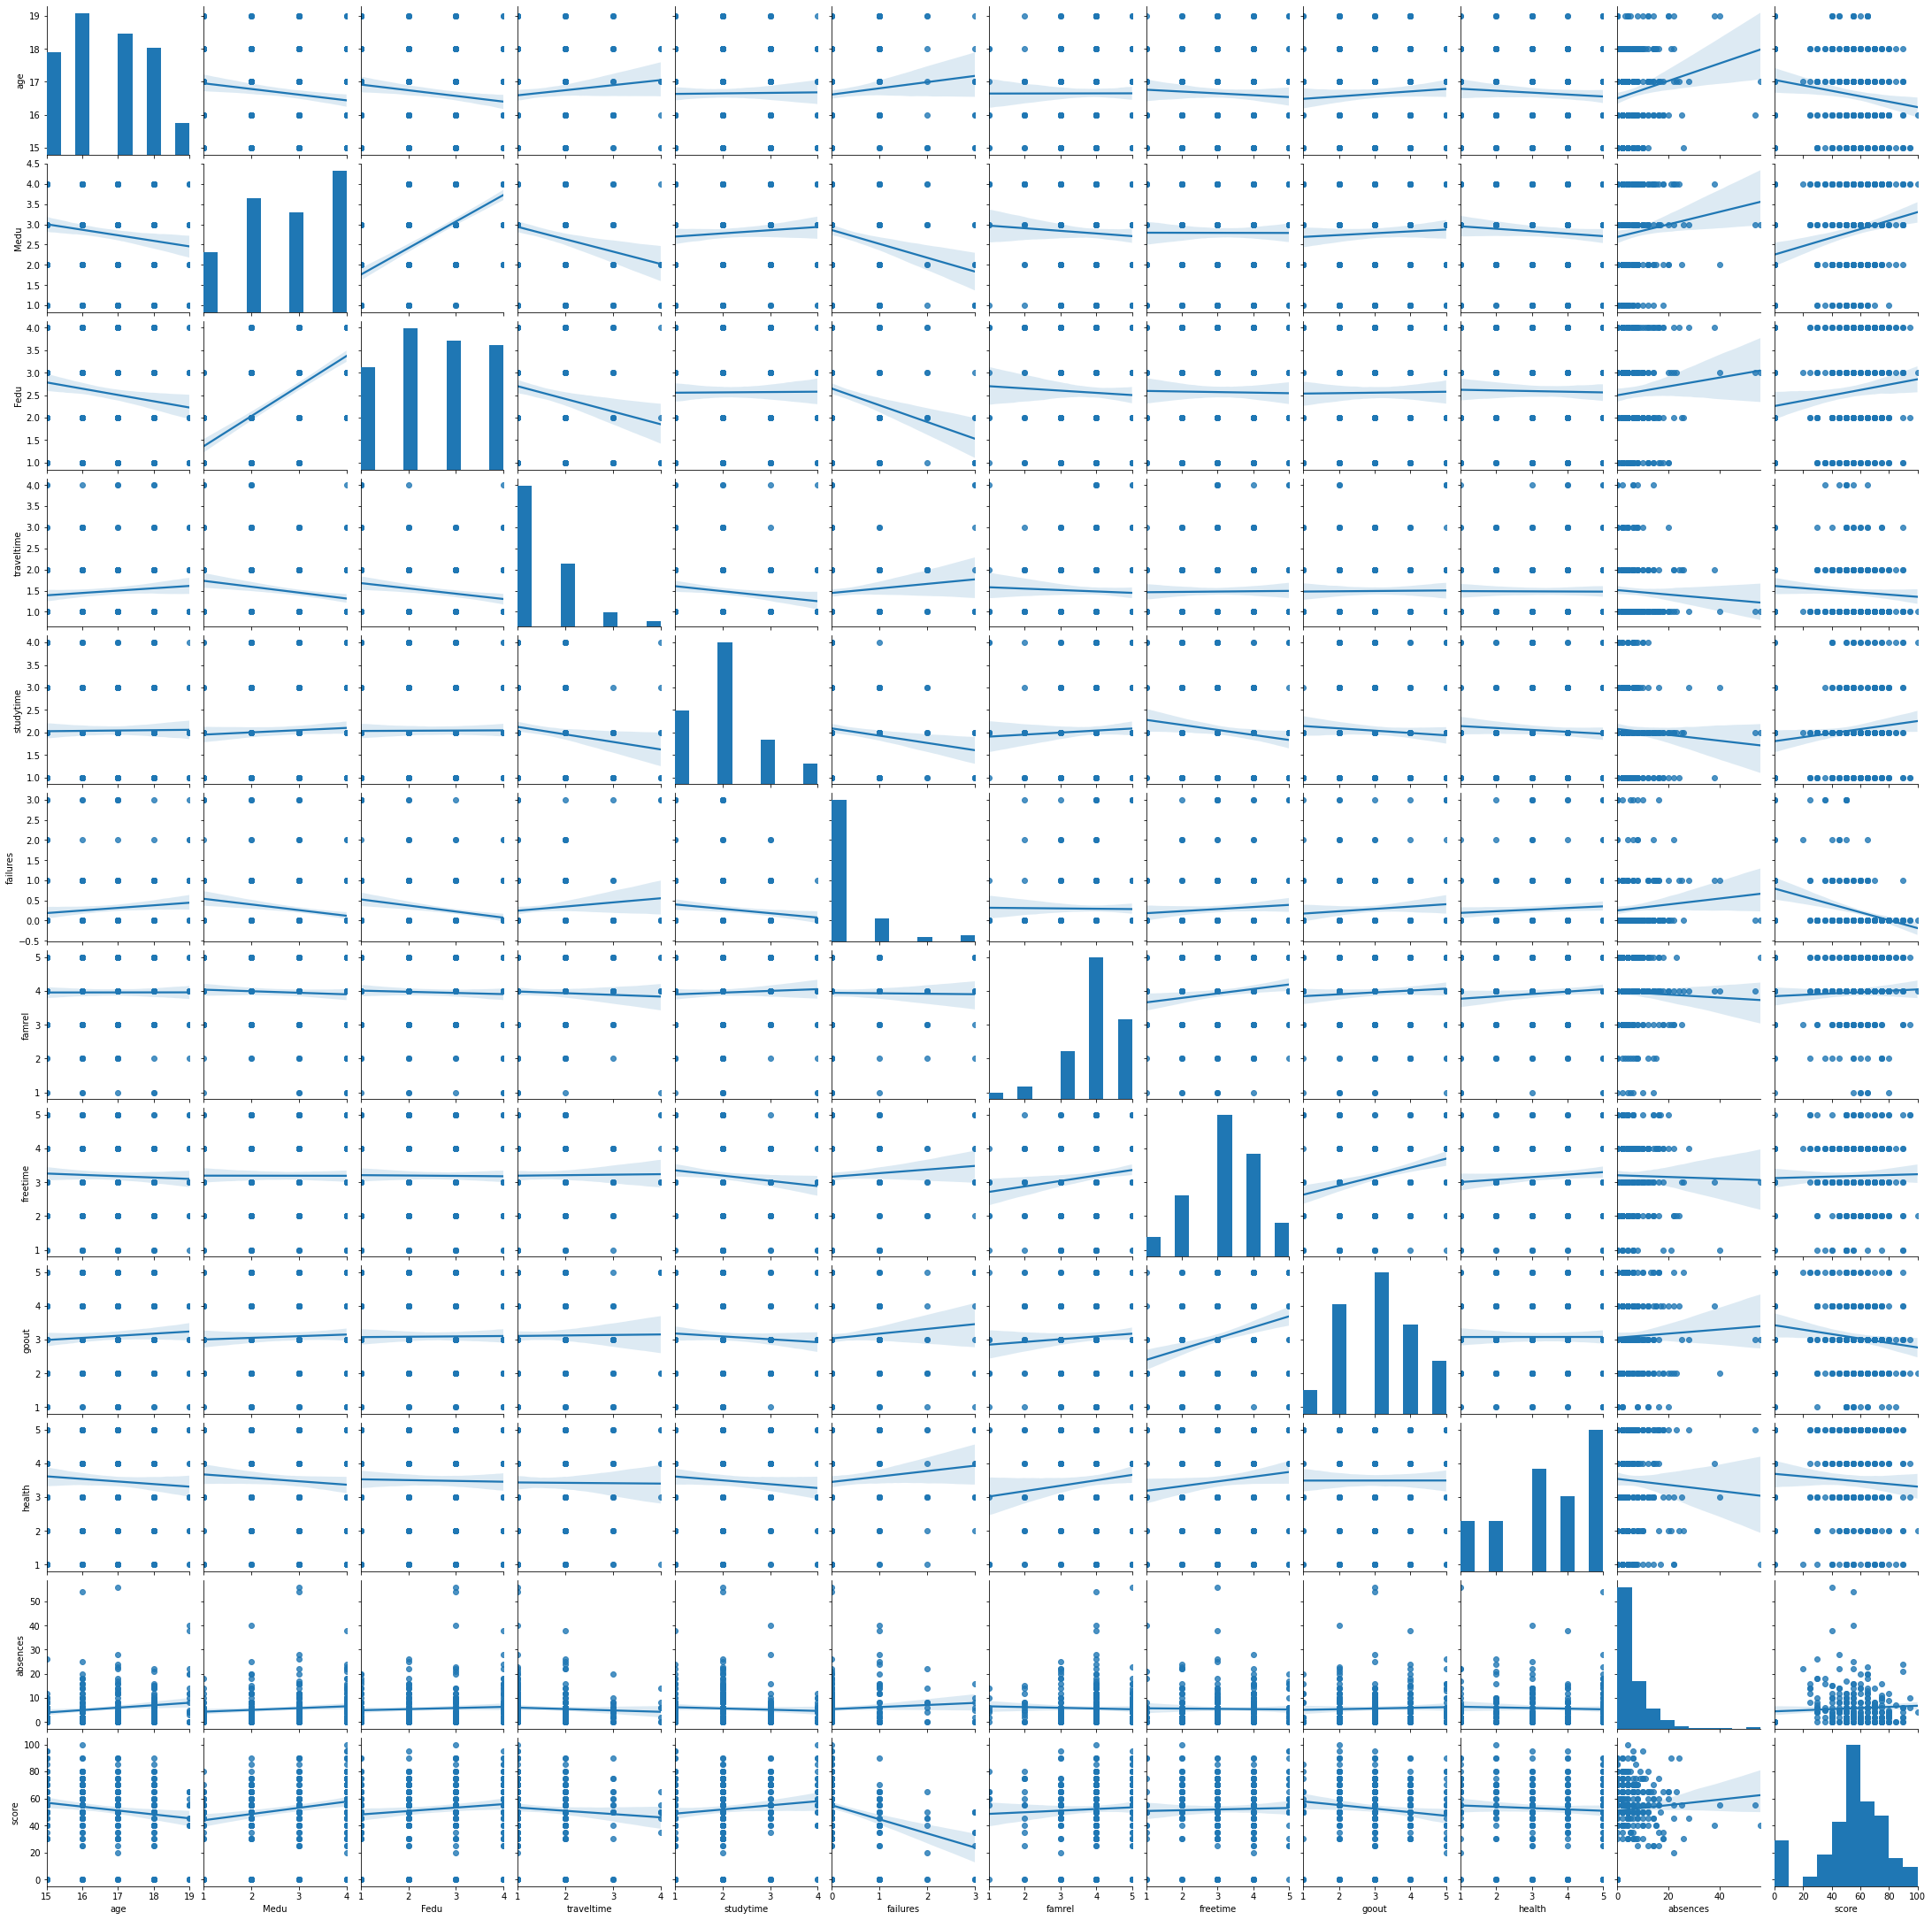

In [45]:
numeric_features = students._get_numeric_data()
sns.pairplot(numeric_features, kind = 'reg')

In [46]:
numeric_features.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.153533,-0.155226,0.092356,0.011143,0.109875,0.001302,-0.046884,0.068629,-0.066695,0.163442,-0.154403
Medu,-0.153533,1.000000,0.663493,-0.206844,0.062795,-0.219419,-0.054741,-0.001383,0.047245,-0.078554,0.107436,0.219854
Fedu,-0.155226,0.663493,1.000000,-0.188202,0.005918,-0.237026,-0.041201,-0.011749,0.010491,-0.018779,0.067509,0.123284
traveltime,0.092356,-0.206844,-0.188202,1.000000,-0.140950,0.105053,-0.040685,0.010732,0.009913,-0.005879,-0.055114,-0.078680
studytime,0.011143,0.062795,0.005918,-0.140950,1.000000,-0.132630,0.048169,-0.131972,-0.066304,-0.069808,-0.057422,0.117130
failures,0.109875,-0.219419,-0.237026,0.105053,-0.132630,1.000000,-0.010631,0.074262,0.090622,0.080805,0.079517,-0.319897
famrel,0.001302,-0.054741,-0.041201,-0.040685,0.048169,-0.010631,1.000000,0.146592,0.067199,0.106220,-0.036902,0.049151
freetime,-0.046884,-0.001383,-0.011749,0.010732,-0.131972,0.074262,0.146592,1.000000,0.293466,0.101430,-0.017213,0.025319
goout,0.068629,0.047245,0.010491,0.009913,-0.066304,0.090622,0.067199,0.293466,1.000000,0.000532,0.041163,-0.132082
health,-0.066695,-0.078554,-0.018779,-0.005879,-0.069808,0.080805,0.106220,0.101430,0.000532,1.000000,-0.048775,-0.061154


Коррелирующие признаки не отмечены. Имеет смысл использовать при моделировании все количественные переменные. Наибольшая корреляция между Medu и Fedu. Похоже партнеры в браке предпочитают такой же уровень образования.

### Номинативные переменные

In [47]:
string_cols = list(students.select_dtypes(include=[object]).columns)

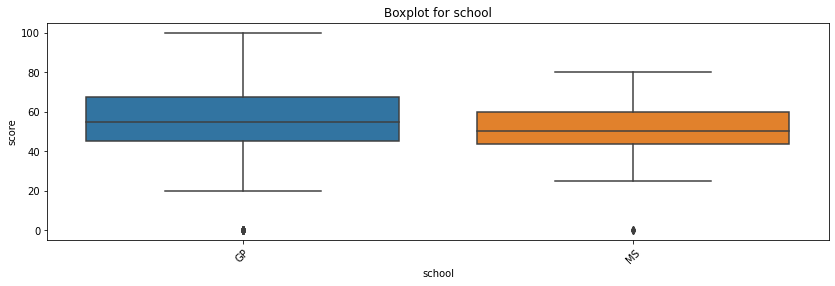

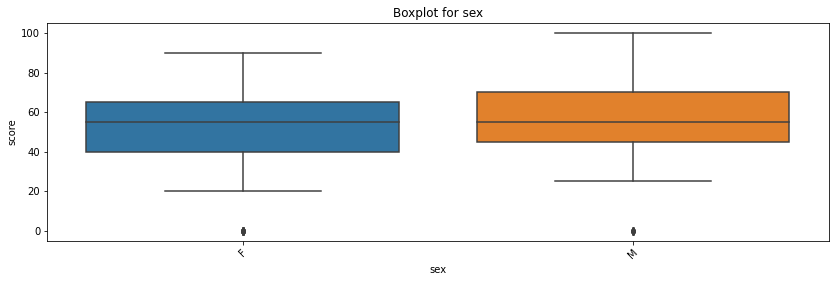

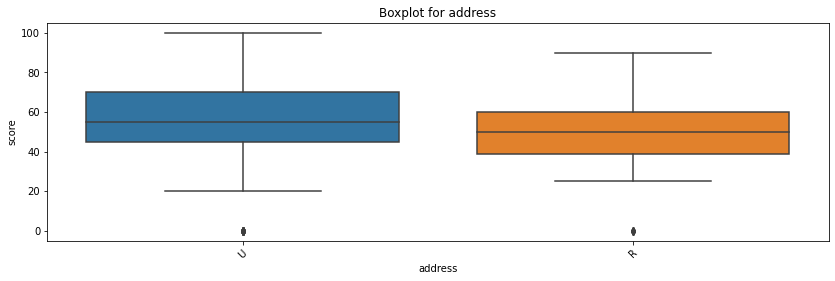

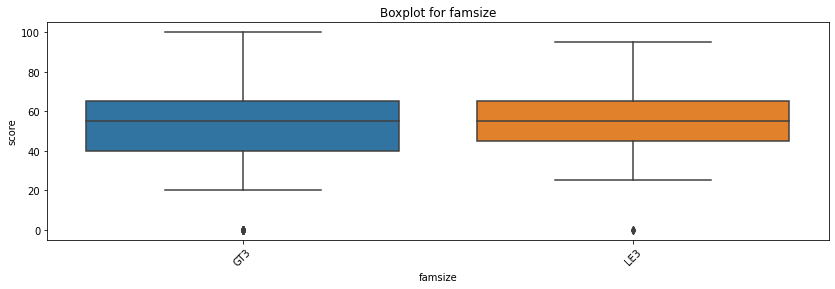

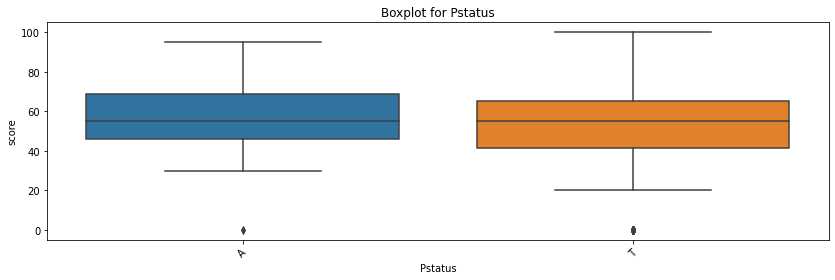

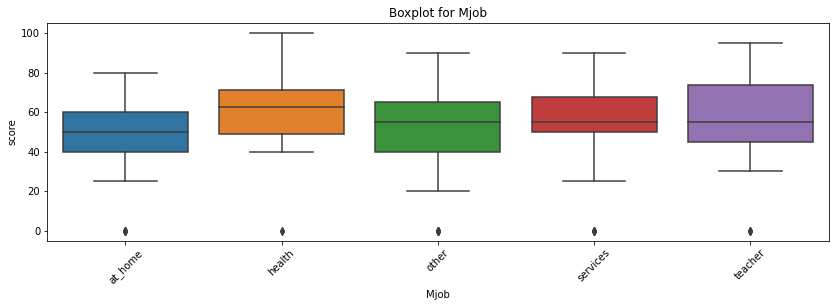

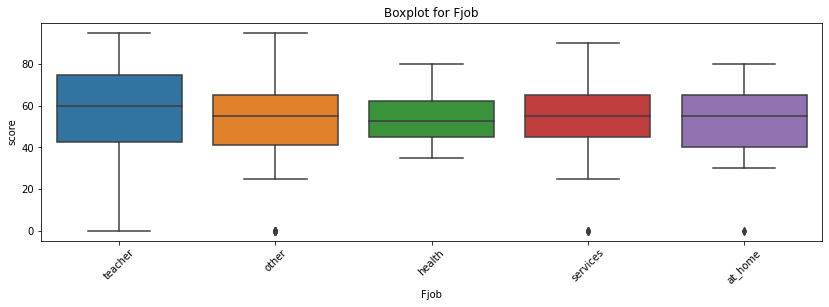

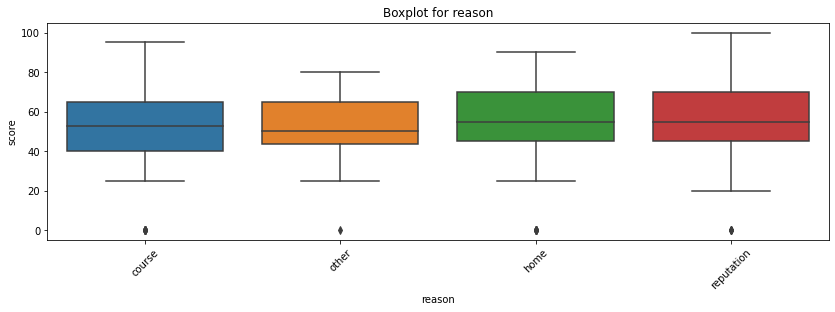

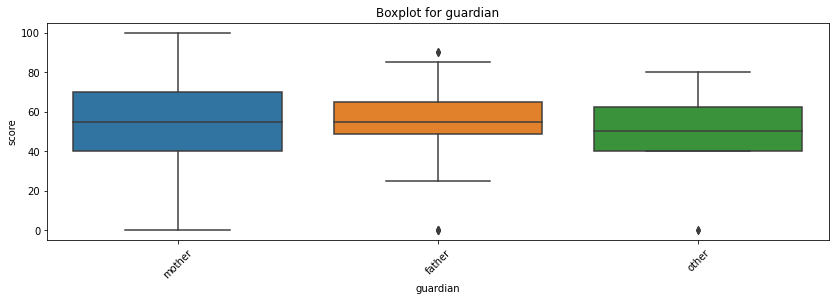

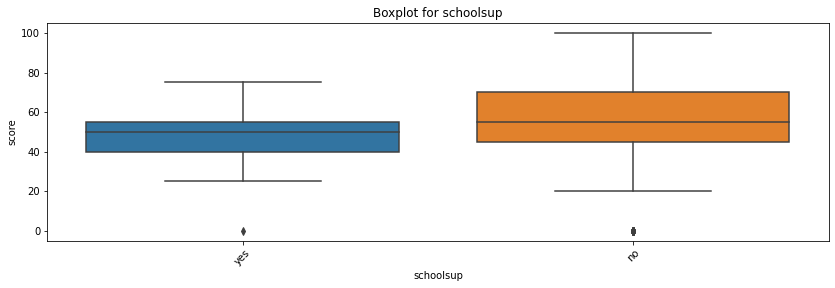

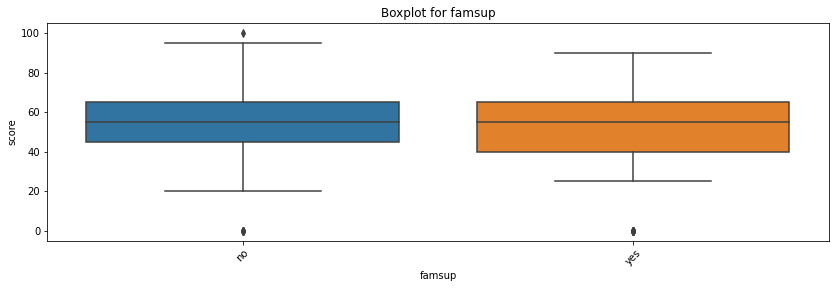

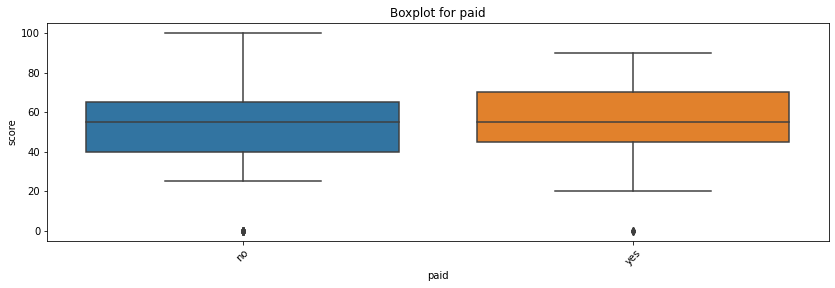

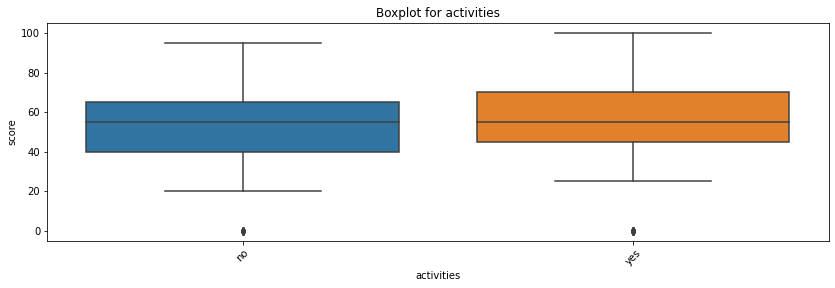

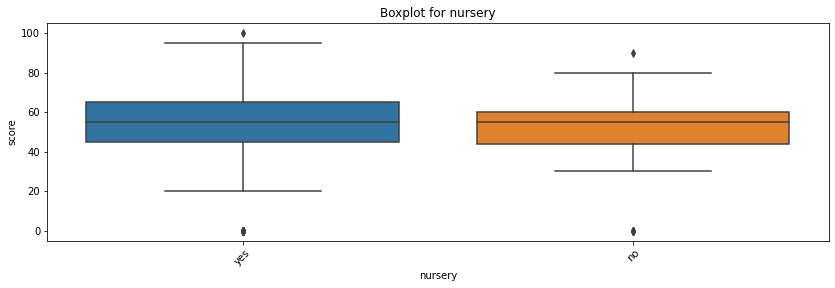

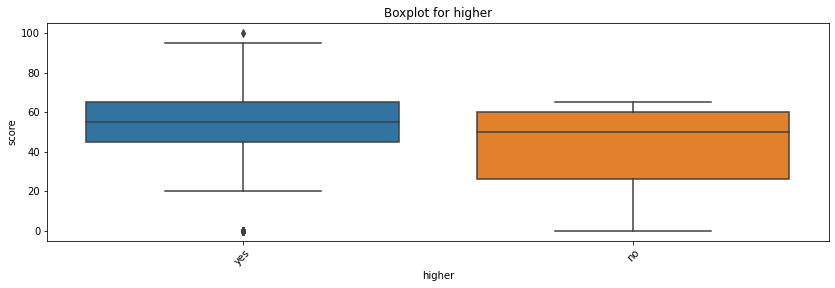

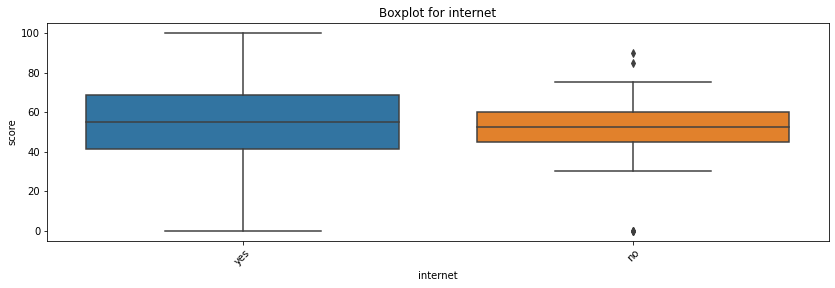

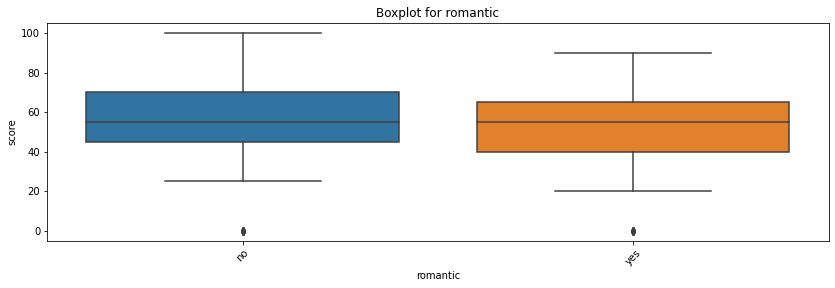

In [48]:
for col in string_cols:
    get_boxplot(col)

In [49]:
for col in string_cols:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher


Только два номинативных признака демонстрируют статистически значимые различия: address и higher. Поэтому добавление к количественным переменным оставляем только их.

In [50]:
students_for_model = students[['address', 'higher'] + list(numeric_features.columns)]
students_for_model.head()

,address,higher,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,U,yes,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,U,yes,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,U,yes,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,U,yes,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,U,yes,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


### Выводы

Полученные данные демонстрируют хороший хороший потенциал для обучения модели. По результатам предварительной обработки данных, количество примеров уменьшилось с 395 до 320 (в основном за счет удаления данных с выбросами или  неожиданными значениями). Для построения модели предлагается использовать все численные признаки за исключением одного - "studytime, granular", а также два номинативных - address и higher. Следует отметить, что в финальных данных присутствуют пропущенные значения с целью выбора наиболее оптимального метода их замены при валидации модели.